In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_column', 999)
pd.set_option('display.max_row', 999)
np.set_printoptions(threshold=5)

from math import radians, cos, sin, asin, sqrt
import scipy.stats as sp
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statistics import mode



#### Olist souhaite parvenir à une segmentation client utilisable au quotidien par l'équipe marketing dans les campagnes de communication.

In [2]:
customers = pd.read_csv('donnee/olist_customers_dataset.csv')
sellers = pd.read_csv('donnee/olist_sellers_dataset.csv')
geolocation = pd.read_csv('donnee/olist_geolocation_dataset.csv')
items = pd.read_csv('donnee/olist_order_items_dataset.csv')
payments = pd.read_csv('donnee/olist_order_payments_dataset.csv')
reviews = pd.read_csv('donnee/olist_order_reviews_dataset.csv')
orders = pd.read_csv('donnee/olist_orders_dataset.csv')
products = pd.read_csv('donnee/olist_products_dataset.csv')
pro_cat_nam = pd.read_csv('donnee/product_category_name_translation.csv')

In [3]:
customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   zip_code_prefix          customer_city customer_state  
0            14409                 franca             SP  
1             9790  sao bernardo do campo             SP  
2             1151              sao paulo             SP  
3             8775        mogi das cruzes             SP  
4            13056               campinas             SP

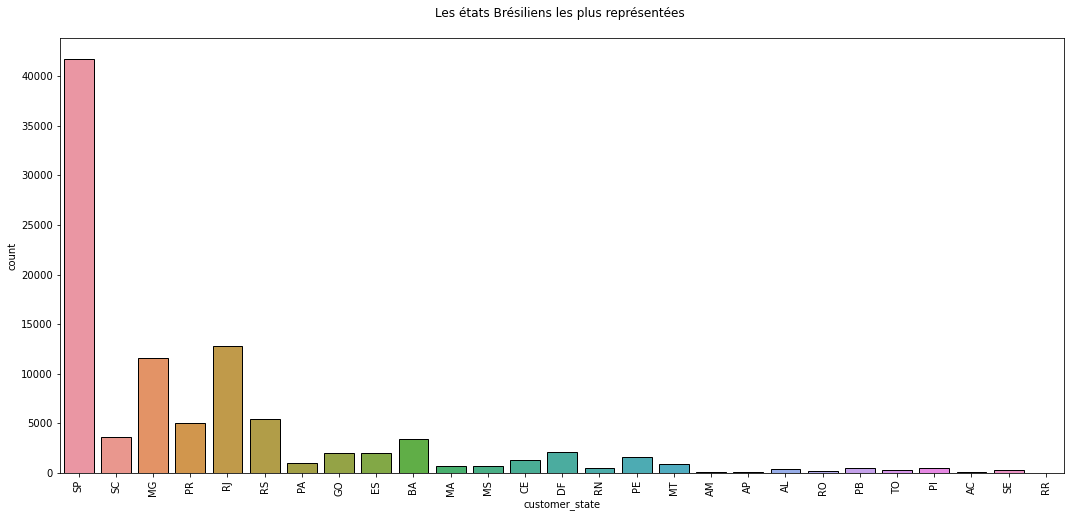

In [4]:
# Countplot of states repartition
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=customers, x="customer_state",
              edgecolor="black")
plt.xticks(range(0, customers["customer_state"].nunique()),
           customers["customer_state"].unique(),
           rotation=90)
plt.title(f"Les états Brésiliens les plus représentées \n",
        )
plt.show()

In [5]:
sellers.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
sellers.head()

seller_id  zip_code_prefix        seller_city  \
0  3442f8959a84dea7ee197c632cb2df15            13023           campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2            13844         mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d            20031     rio de janeiro   
3  c0f3eea2e14555b6faeea3dd58c1b1c3             4195          sao paulo   
4  51a04a8a6bdcb23deccc82b0b80742cf            12914  braganca paulista   

  seller_state  
0           SP  
1           SP  
2           RJ  
3           SP  
4           SP

In [6]:
geolocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geolocation.head()

zip_code_prefix  geolocation_lat  geolocation_lng geolocation_city  \
0             1037       -23.545621       -46.639292        sao paulo   
1             1046       -23.546081       -46.644820        sao paulo   
2             1046       -23.546129       -46.642951        sao paulo   
3             1041       -23.544392       -46.639499        sao paulo   
4             1035       -23.541578       -46.641607        sao paulo   

  geolocation_state  
0                SP  
1                SP  
2                SP  
3                SP  
4                SP

In [7]:
print("Number of rows before dropping duplicates in geo_location : ", geolocation.shape[0])
geolocation.drop_duplicates(subset="zip_code_prefix", keep="first", inplace=True)
print("Number of rows after dropping duplicates in geo_locations : ",geolocation.shape[0])

Number of rows before dropping duplicates in geo_location :  1000163
Number of rows after dropping duplicates in geo_locations :  19015


In [8]:
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [9]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

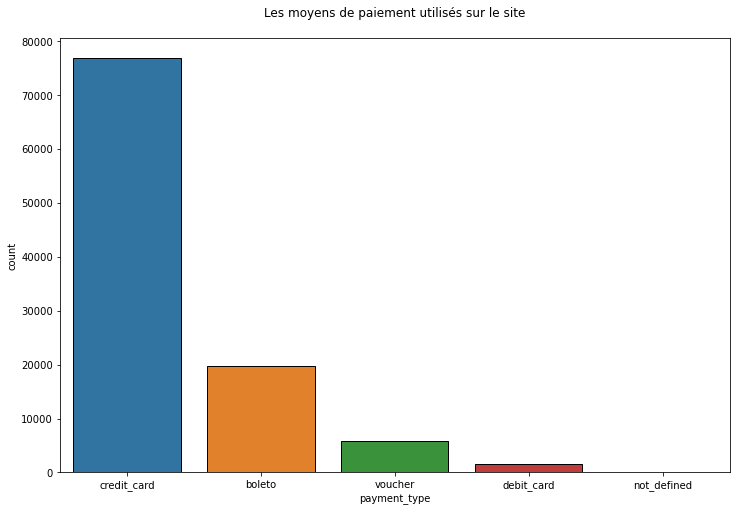

In [10]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=payments, x="payment_type",
              edgecolor="black",
              )
plt.title(f"Les moyens de paiement utilisés sur le site\n",
         )
plt.show()

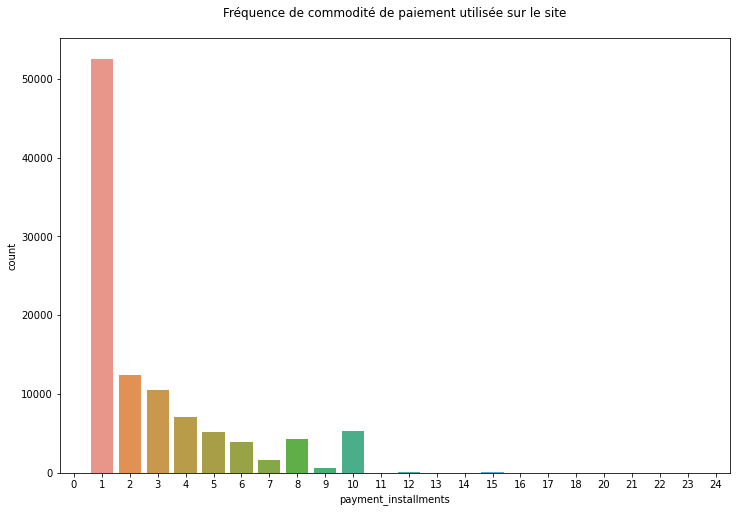

In [11]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=payments, x="payment_installments")
plt.title(f"Fréquence de commodité de paiement utilisée sur le site\n",)
plt.show()

##### Nous voyons que les clients dépensent jusqu'à 10 versements, mais un seul retrait est le plus utilisé.

In [12]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [13]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [14]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [15]:
pro_cat_nam.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

### Merge Datasets

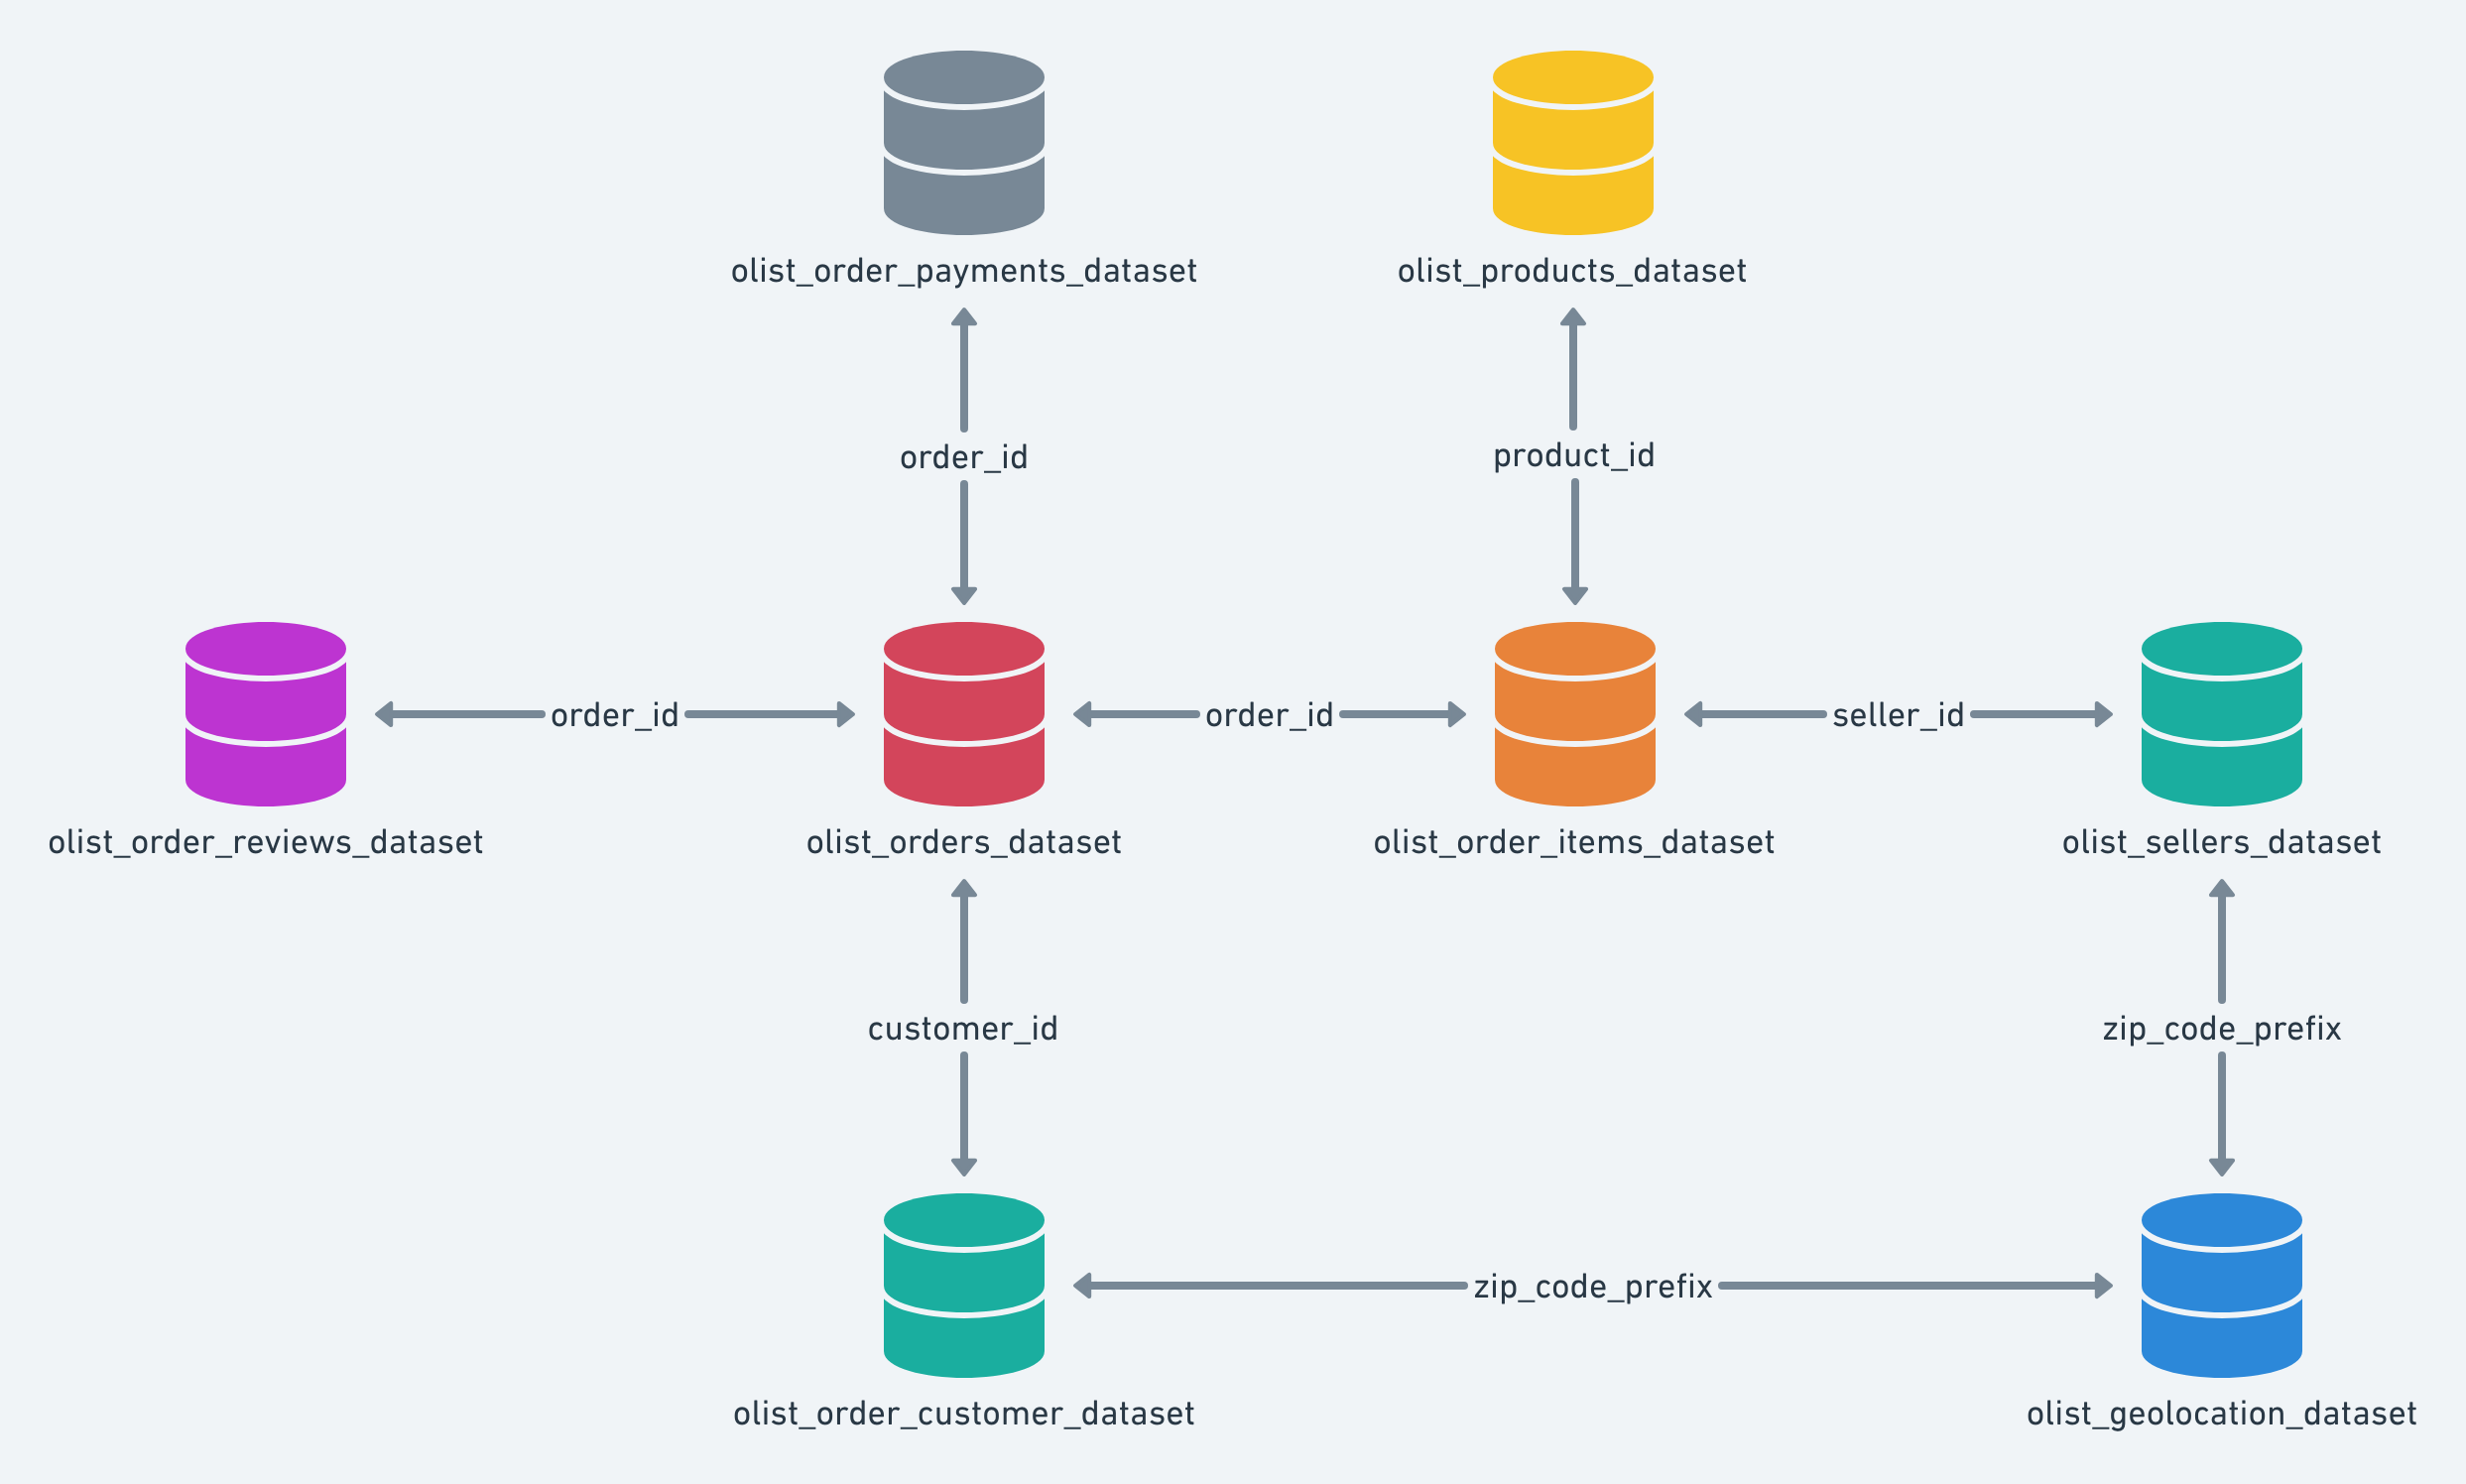

In [16]:
geo_customer = pd.merge(customers, geolocation,how="left", on="zip_code_prefix")
geo_seller = pd.merge(sellers, geolocation, how="left", on="zip_code_prefix")
payment_order = pd.merge(payments, orders, on="order_id")
product_item = pd.merge(products, items, on="product_id")
pay_order_review = pd.merge(payment_order, reviews, on="order_id")
review_customer = pd.merge(pay_order_review, geo_customer, on="customer_id")
prod_item_seller = pd.merge(product_item, geo_seller, on="seller_id")
data = pd.merge(review_customer, prod_item_seller,on="order_id", suffixes=("_customer", "_seller"))

### Valeurs_manquantes

In [17]:
data.shape

(117329, 47)

In [18]:
Valeurs_manquantes = pd.concat([data.isna().sum().sort_values(ascending = False), 
                              ((data.isna().sum()/data.isna().count())*100).sort_values(ascending=False), 
                              data.dtypes], axis=1, keys=['Total', 'Missing_%','Type'])


In [19]:
Valeurs_manquantes

Total  Missing_%     Type
review_comment_title           103437  88.159790   object
review_comment_message          67650  57.658379   object
order_delivered_customer_date    2471   2.106044   object
product_photos_qty               1695   1.444656  float64
product_category_name            1695   1.444656   object
product_name_lenght              1695   1.444656  float64
product_description_lenght       1695   1.444656  float64
order_delivered_carrier_date     1235   1.052596   object
geolocation_lng_customer          316   0.269328  float64
geolocation_lat_customer          316   0.269328  float64
geolocation_city_customer         316   0.269328   object
geolocation_state_customer        316   0.269328   object
geolocation_city_seller           264   0.225008   object
geolocation_state_seller          264   0.225008   object
geolocation_lat_seller            264   0.225008  float64
geolocation_lng_seller            264   0.225008  float64
product_length_cm                  20   0.017046  float64
product_height_cm                  20   0.017046  float64
product_width_cm                   20   0.017046  float64
product_weight_g                   20   0.017046  float64
order_approved_at                  15   0.012785   object
order_purchase_timestamp            0   0.000000   object
review_id                           0   0.000000   object
order_estimated_delivery_date       0   0.000000   object
order_status                        0   0.000000   object
seller_state                        0   0.000000   object
customer_id                         0   0.000000   object
payment_value                       0   0.000000  float64
payment_installments                0   0.000000    int64
payment_type                        0   0.000000   object
payment_sequential                  0   0.000000    int64
review_score                        0   0.000000    int64
review_creation_date                0   0.000000   object
seller_city                         0   0.000000   object
review_answer_timestamp             0   0.000000   object
customer_unique_id                  0   0.000000   object
zip_code_prefix_customer            0   0.000000    int64
customer_city                       0   0.000000   object
customer_state                      0   0.000000   object
zip_code_prefix_seller              0   0.000000    int64
freight_value                       0   0.000000  float64
price                               0   0.000000  float64
shipping_limit_date                 0   0.000000   object
product_id                          0   0.000000   object
seller_id                           0   0.000000   object
order_item_id                       0   0.000000    int64
order_id                            0   0.000000   object

In [20]:
data.drop(['review_id', 'review_comment_title', 'review_comment_message',
           'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

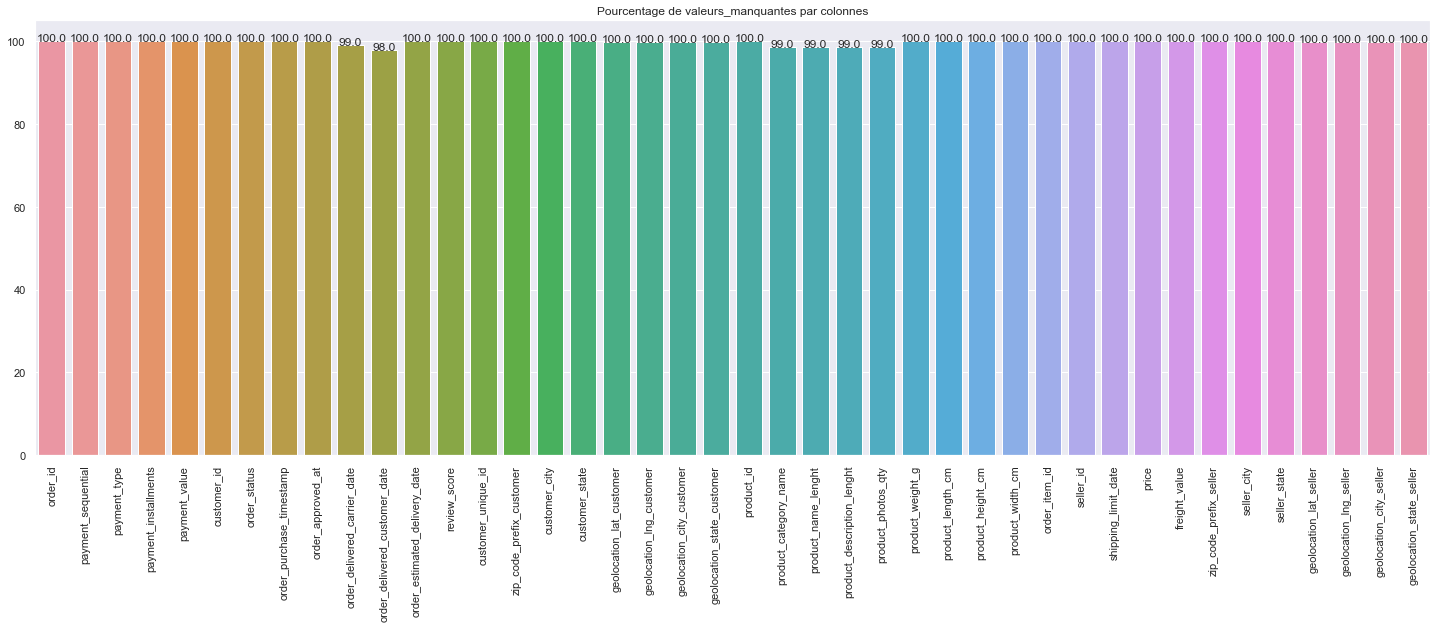

In [21]:
def Valeurs_manquantes(df):
    nb_row = df.shape[0]
    percentage_na_col = df.apply(lambda x: (x.notna().sum()/nb_row)*100, axis=0)
    sns.set(font_scale=1)
    plt.figure(figsize=(25, 8))
    ax = sns.barplot(x=percentage_na_col.index, y=percentage_na_col.values)
    plt.xticks(rotation=90)
    i = 0
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+0.4, height,
                round(percentage_na_col.values[i], 0), ha='center')
        i += 1
    
    plt.title('Pourcentage de valeurs_manquantes par colonnes')
    plt.show()


Valeurs_manquantes(data)

#### Changement date columns into datetime, from object

In [22]:
date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for i in date_cols:
 
  orders[i] = pd.to_datetime(orders[i])
  
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# Exploration des données totales et Feature engineering

### En termes de Commandes

In [23]:
data["order_status"].value_counts()

delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
Name: order_status, dtype: int64

On voir que il y a des commandes en cours ou annulées. Ne traitons que ceux qui ont été livrés.
Nous ne pouvons pas considérer comme clients ceux qui n'ont pas effectué d'opération d'achat de produit sur le site.

In [24]:
encours_non_livrés = orders[orders["order_status"] != "delivered"]["order_status"].value_counts().sum()

print("Nombre de commandes non livrées : ", encours_non_livrés)
print("Pourcentage de commandes non livrées : ",
     (encours_non_livrés*100/orders.shape[0]).round(3), "%")


Nombre de commandes non livrées :  2963
Pourcentage de commandes non livrées :  2.98 %


In [25]:
encours_non_livrés = orders[orders["order_status"] != "delivered"]["order_status"].value_counts().sum()

Du nombre de commandes passées par jour sur le site E-Commerce :

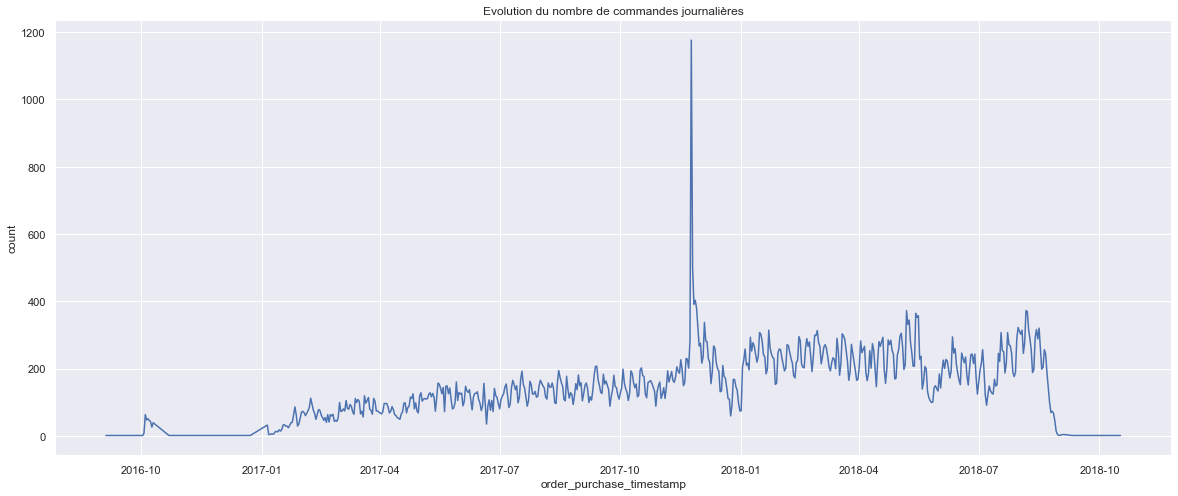

In [26]:
commandes_par_jour = orders.groupby(orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = commandes_par_jour.plot()
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières")
plt.show()

Nous constatons une augmentation de fin d'année en 2017 ; ça doit être les achats de Noël.

Et aussi On peut voir la répartition du nombre de commandes par mois, jour de la semaine ou heure de la journée :

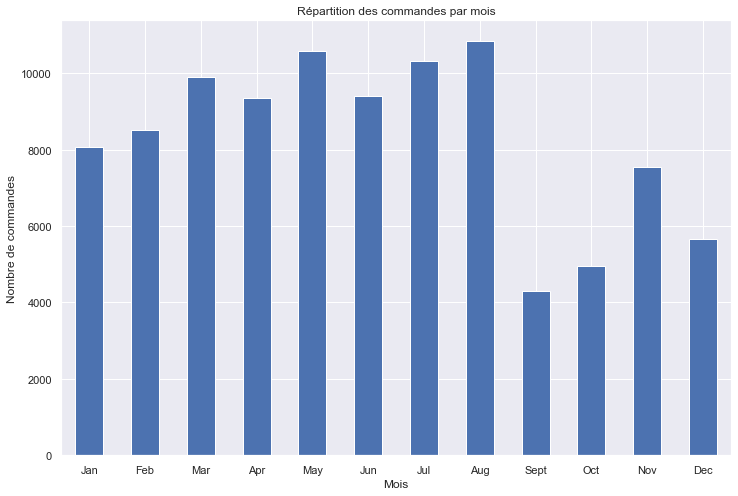

In [27]:
orders.groupby(orders['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nombre de commandes",
          xlabel="Mois",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

Nous voyons des ventes avec une forte augmentation en août, ceux-ci pourraient être des achats de retour à l'école.

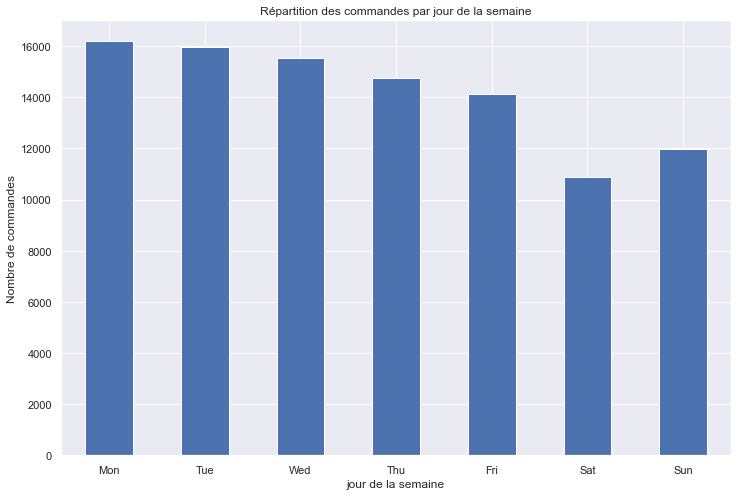

In [28]:
orders.groupby(orders['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nombre de commandes",
          xlabel="jour de la semaine",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

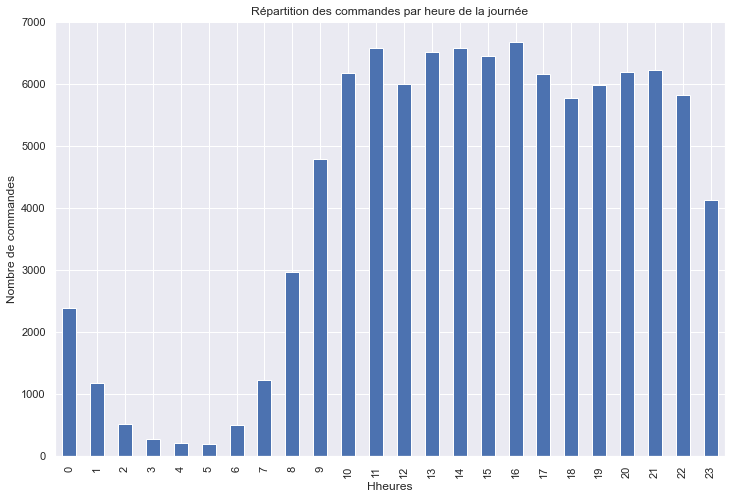

In [29]:
orders.groupby(orders['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nombre de commandes",
          xlabel="Hheures",
          legend=False)
plt.show()

Pendant la journée, nous constatons que la plupart des commandes sont passées près de la pause déjeuner ou vers la fin de la journée de travail. (11h à 16h)

####  En termes de Produits

In [30]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

###### Produits volume 

In [31]:
data['product_volume_cm3'] = data.product_length_cm * \
    data.product_height_cm*data.product_width_cm

In [32]:
data['product_volume_cm3']

0          7803.0
1          1056.0
2          3360.0
3          3080.0
4          3080.0
           ...   
117324    57000.0
117325    36000.0
117326     1408.0
117327     2112.0
117328     9009.0
Name: product_volume_cm3, Length: 117329, dtype: float64

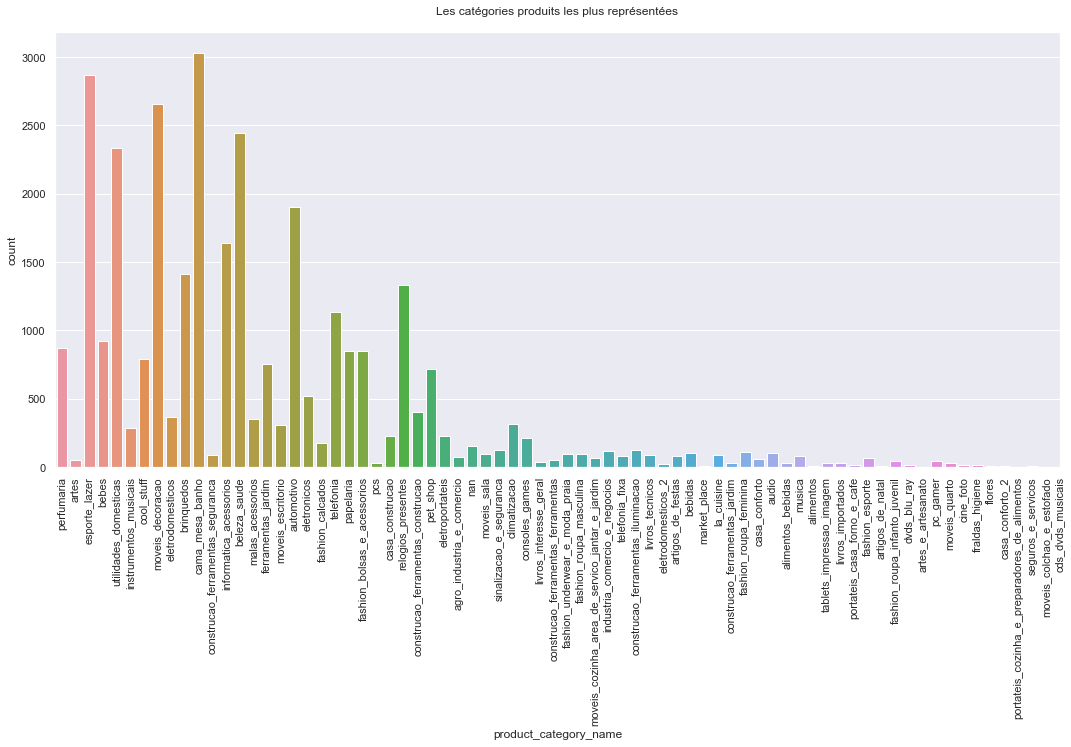

In [33]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name")
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title(f"Les catégories produits les plus représentées\n")
plt.show()

Text(0, 0.5, 'Product category')

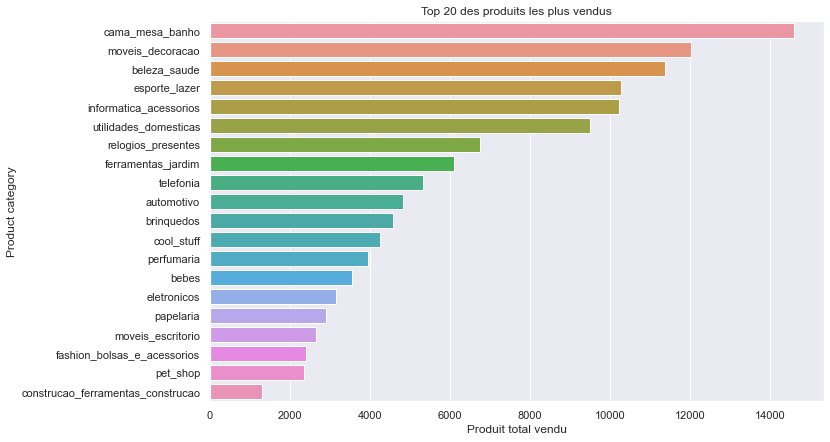

In [34]:
top_20_productits_plus_vendu = data['order_item_id'].groupby(data['product_category_name']).sum().sort_values(ascending=False)[:20]

fig=plt.figure(figsize=(11,7))
sns.barplot(y=top_20_productits_plus_vendu.index,x=top_20_productits_plus_vendu.values)
plt.title('Top 20 des produits les plus vendus')
plt.xlabel('Produit total vendu')
plt.ylabel('Product category')

### En termes de Clients

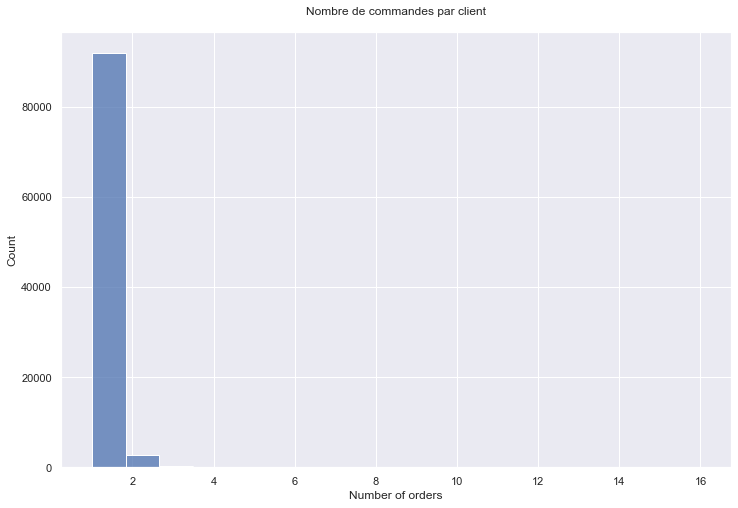

In [35]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id")
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n")
plt.show()

On peut voir que seuls environ 3% des clients ont réalisé plus d'une commande.

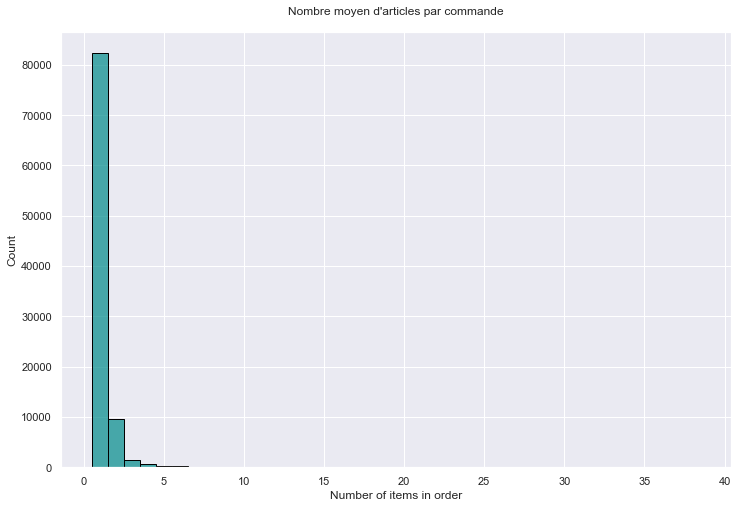

In [36]:
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

# Plot density of number items in order
fig = plt.figure(figsize=(12, 8))
sns.histplot(data = products_per_order,
             x="order_item_id",
             discrete=True,
             edgecolor="black",
             color="darkcyan", alpha=0.7)
plt.xlabel("Number of items in order")
plt.title(f"Nombre moyen d'articles par commande\n")
plt.show()

Dans ce graphique, nous voyons le nombre moyen de produits par commande pour chaque client

##### Top 10 Meilleurs acheteurs

Text(0, 0.5, 'Customer ID')

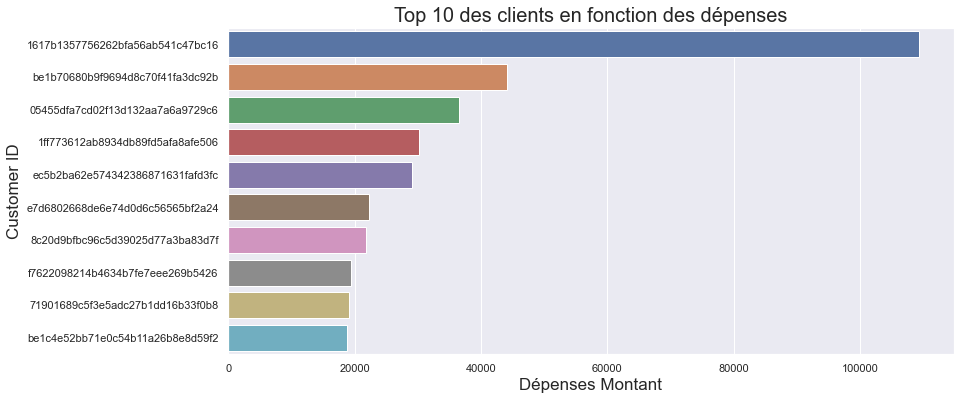

In [37]:
top_10_customer_shopping = data['payment_value'].groupby(data['customer_id']).sum().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(13,6))
sns.barplot(y=top_10_customer_shopping.index,x=top_10_customer_shopping.values)
plt.title('Top 10 des clients en fonction des dépenses',fontsize=20)
plt.xlabel('Dépenses Montant',fontsize=17)
plt.ylabel('Customer ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

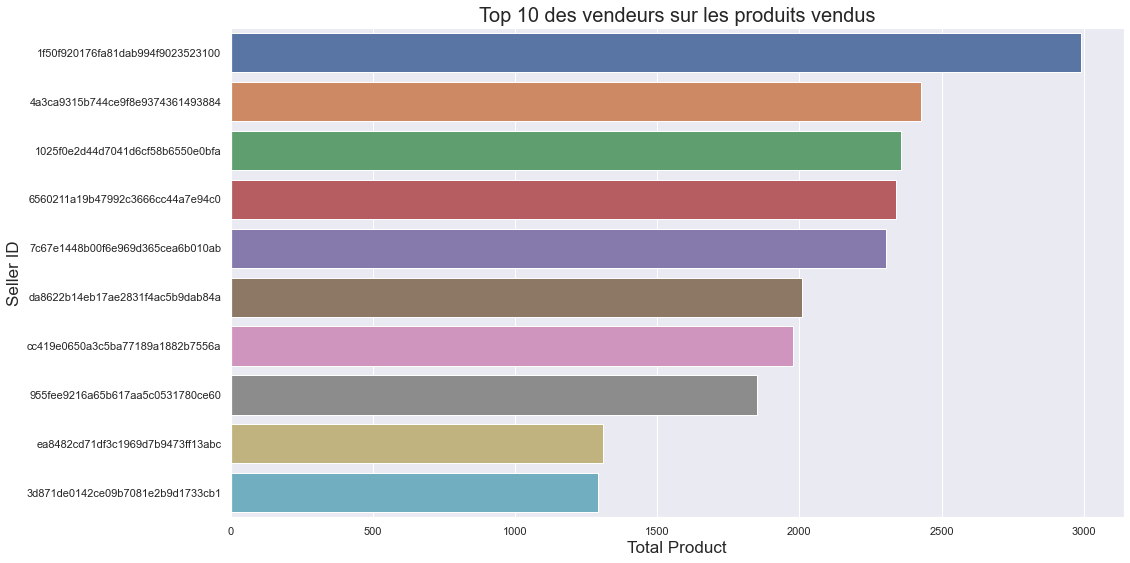

In [38]:
top_10_seller_order = data['order_item_id'].groupby(data['seller_id']).sum().sort_values(ascending=False)[:10]

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.values)
plt.title('Top 10 des vendeurs sur les produits vendus',fontsize=20)
plt.xlabel('Total Product',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

Text(0, 0.5, 'Seller ID')

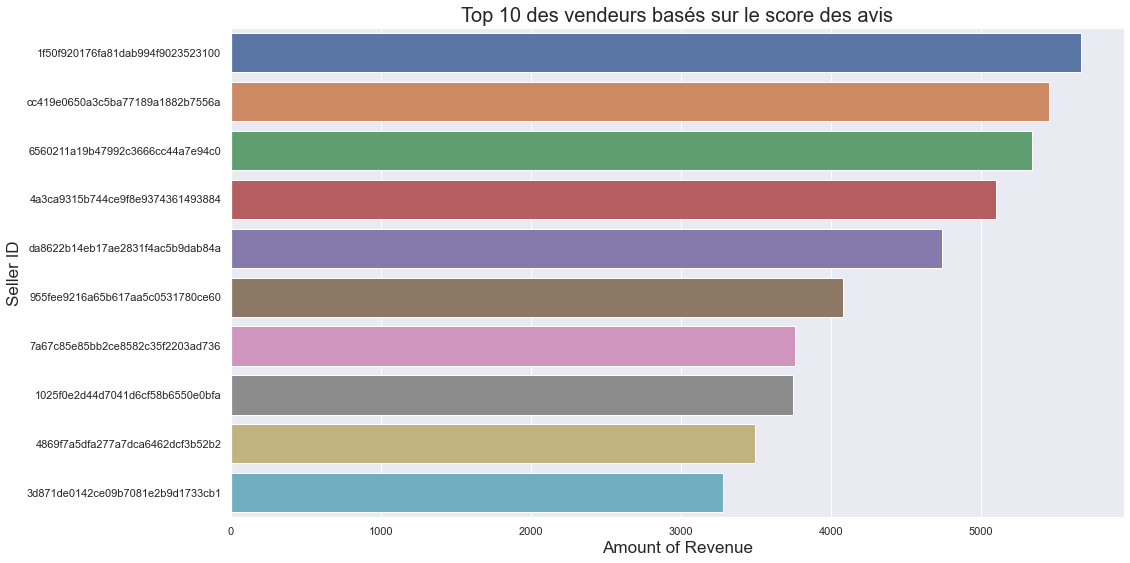

In [39]:
top_10_seller_order = data[data['review_score'] == 5].groupby(data['seller_id']).sum().sort_values(by=['review_score'],ascending=False)[:10]

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.review_score)
plt.title('Top 10 des vendeurs basés sur le score des avis',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

### En termes de Commande et Son Temps

In [40]:
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_purchase_day'] = orders['order_purchase_timestamp'].dt.day
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].dt.hour

In [41]:
def danslajourne(x):
    if 4 < x <= 12:
        return 'matin'
    elif 12 < x < +20:
        return 'après-midi'
    else:
        return 'nuit'

orders['danslajourne'] = orders.apply(lambda x: danslajourne(x.order_purchase_hour), axis=1)

In [42]:
def saison(x):
    if x in [12, 1, 2]:
        return 'hiver'
    elif x in [3, 4, 5]:
        return 'printemps'
    elif x in [6, 7, 8]:
        return 'été'
    elif x in [9, 10, 11]:
        return 'automne'


orders['saison'] = orders.apply(lambda x: saison(x.order_purchase_month), axis=1)

In [43]:
def mois(x):
    if x in range(11):
        return 'début'
    elif x in range(11, 21):
        return 'milieu'
    elif x in range(21, 32):
        return 'fin'


orders['mois'] = orders.apply(lambda x: mois(x.order_purchase_month), axis=1)

##### Top villes par nombre de commandes par état

Text(0.5, 1.0, 'Top villes par nombre de commandes par état')

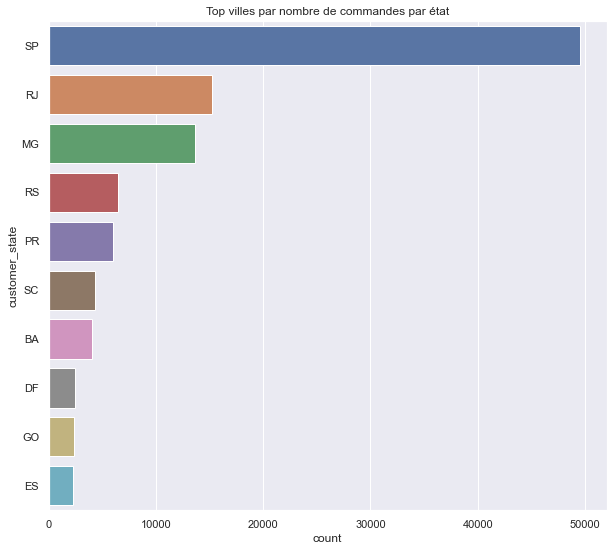

In [44]:
fig=plt.figure(figsize=(10,9))
top_orders_cities = data.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending=False)
top_orders_cities.rename(columns={"order_id":"count"}, inplace=True)
ax = sns.barplot(x="count", y="customer_state", data=top_orders_cities[:10])
ax.set_title("Top villes par nombre de commandes par état")

### En termes de Livraison et Revıew

In [45]:
orders['order_purchase_dayofweek'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['order_purchase_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_purchase_day'] = orders['order_purchase_timestamp'].dt.day
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].dt.hour

In [46]:
data['temps_commande_livraison'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
data['temps_commande_livraison_prevue'] = (orders['order_estimated_delivery_date']-orders['order_purchase_timestamp']).dt.days

data['livraison_en_retard'] = data['order_delivered_customer_date'] > data['order_estimated_delivery_date']

In [47]:
data['order_purchase_dayofweek']= orders['order_purchase_dayofweek'] 
data['order_purchase_year']=orders['order_purchase_year'] 
data['order_purchase_month']=orders['order_purchase_month'] 
data['order_purchase_day']=orders['order_purchase_day'] 
data['order_purchase_hour']=orders['order_purchase_hour'] 

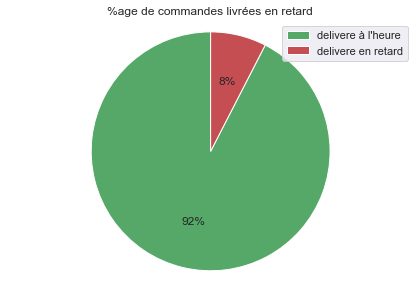

In [48]:
retard_data = data['livraison_en_retard'].value_counts()
labels = ["delivere à l'heure", 'delivere en retard']
sizes = retard_data.values
colors = ['g', 'r']
patches, _, _ = plt.pie(sizes, colors=colors, startangle=90, autopct='%1.0f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("%age de commandes livrées en retard")
plt.show()

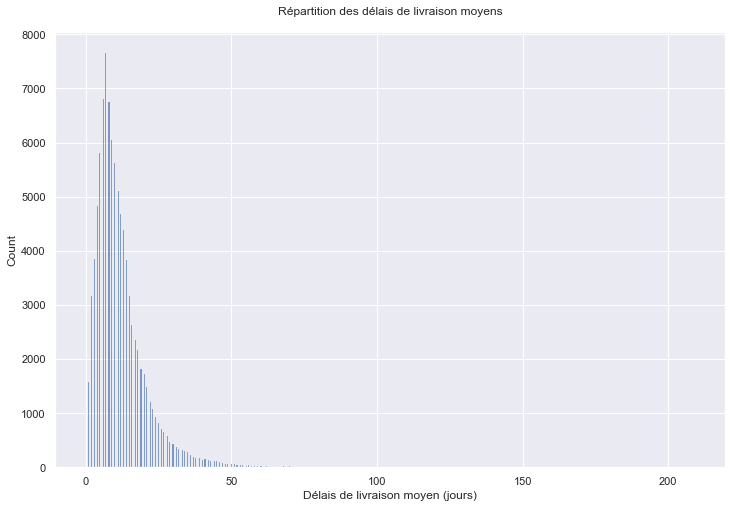

In [49]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="temps_commande_livraison")
plt.xlabel("Délais de livraison moyen (jours)")
plt.title(f"Répartition des délais de livraison moyens\n")
plt.show()

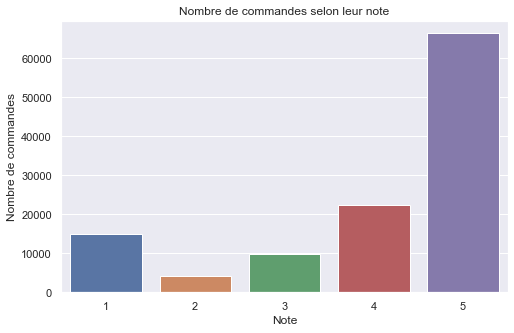

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data.groupby('review_score').count()[
            'order_id'].reset_index(), x='review_score', y='order_id')
plt.title('Nombre de commandes selon leur note')
plt.xlabel('Note')
plt.ylabel('Nombre de commandes')
plt.show()

Nous constatons que les clients qui achètent les produits sont généralement satisfaits

In [51]:
prd_rev_means = data.groupby('product_category_name').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending=False).nlargest(10, 'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending=False).nsmallest(10, 'review_score')

Text(0, 0.5, 'Categorie du produit')

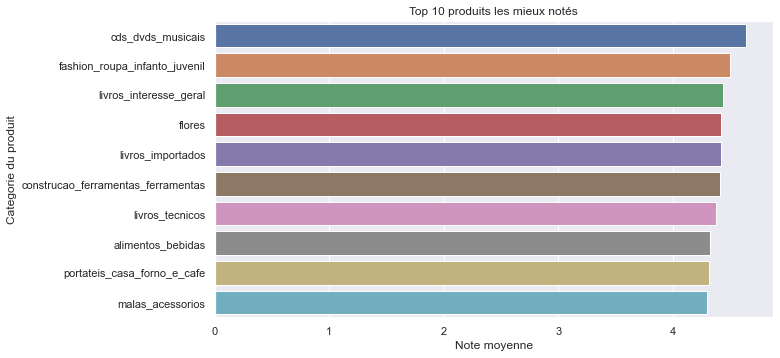

In [52]:
plt.figure(figsize=(10, 12))
plt.subplot(211)
sns.barplot(data=top_10_ratings, x='review_score',y='product_category_name')
plt.title('Top 10 produits les mieux notés')
plt.xlabel('Note moyenne')
plt.ylabel('Categorie du produit')

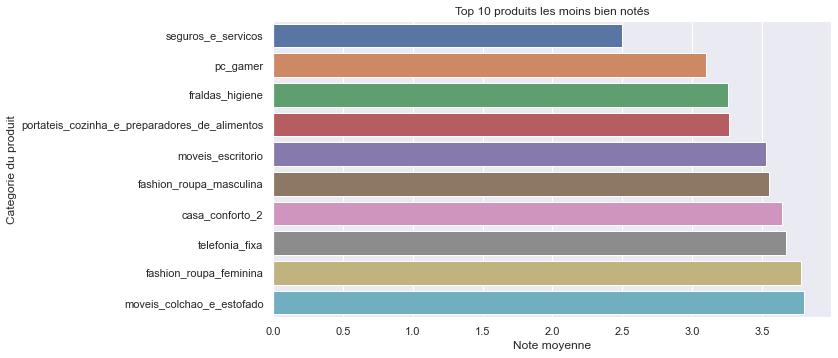

In [53]:
plt.figure(figsize=(10, 12))
plt.subplot(212)
sns.barplot(data=lowest_10_ratings, x='review_score',y='product_category_name')
plt.title('Top 10 produits les moins bien notés')
plt.xlabel('Note moyenne')
plt.ylabel('Categorie du produit')
plt.show()

### En termes de Produits et Ses catégories

Il y a 72 catégories au total. Ceux-ci peuvent causer des problèmes dans le encodage des données.
Pour un examen facile, nous rassemblerons les catégories sous les rubriques les plus larges.

Fashion, clothing and accessories
Health and Beauty
Toys and baby equipment
Books, CDs and other physical media
Groceries, food and drink
Technology (including phones and computers)
Home and furniture
Flowers and gifts
Other
et nous ajoutons la catégorie sport
Nous allons devoir les attribuer manuellement :

In [54]:
data['product_category_name']

0                           casa_construcao
1                                automotivo
2                                perfumaria
3                           cama_mesa_banho
4                           cama_mesa_banho
                        ...                
117324    construcao_ferramentas_iluminacao
117325                            papelaria
117326                           automotivo
117327                         beleza_saude
117328                      cama_mesa_banho
Name: product_category_name, Length: 117329, dtype: object

In [55]:
data['product_category_name'].value_counts()

cama_mesa_banho                                   11847
beleza_saude                                       9944
esporte_lazer                                      8942
moveis_decoracao                                   8743
informatica_acessorios                             8105
utilidades_domesticas                              7331
relogios_presentes                                 6161
telefonia                                          4692
ferramentas_jardim                                 4558
automotivo                                         4356
brinquedos                                         4246
cool_stuff                                         3964
perfumaria                                         3575
bebes                                              3178
eletronicos                                        2827
papelaria                                          2607
fashion_bolsas_e_acessorios                        2159
pet_shop                                        

In [56]:
pro_cat_nam['product_category_name_english'].value_counts()

furniture_mattress_and_upholstery          1
bed_bath_table                             1
cool_stuff                                 1
computers                                  1
diapers_and_hygiene                        1
costruction_tools_garden                   1
baby                                       1
costruction_tools_tools                    1
luggage_accessories                        1
air_conditioning                           1
cine_photo                                 1
home_appliances_2                          1
construction_tools_safety                  1
fashion_childrens_clothes                  1
housewares                                 1
fixed_telephony                            1
fashion_underwear_beach                    1
fashio_female_clothing                     1
kitchen_dining_laundry_garden_furniture    1
flowers                                    1
furniture_decor                            1
sports_leisure                             1
home_confo

In [57]:
pro_cat_nam['product_category_name_english'].value_counts().sum()

71

Toplamda 71 tane kategori var. Bunları en sık kullanan olarak gruplamamız lazım.

In [58]:
data['product_category'] = np.where((data['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           np.where((data['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           np.where((data['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           np.where((data['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           np.where((data['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           np.where((data['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           np.where((data['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                           np.where((data['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           np.where((data['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

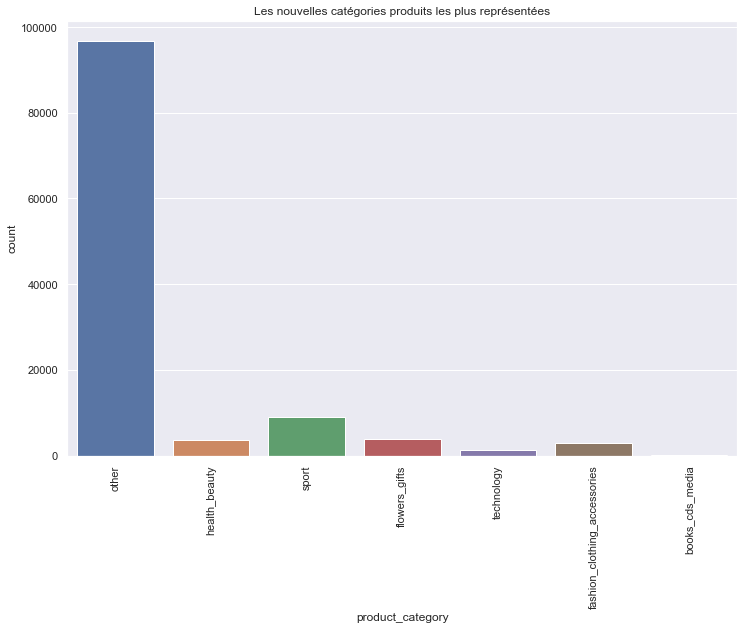

In [59]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="product_category")
plt.xticks(range(0, data["product_category"].nunique()),
           data["product_category"].unique(),
           rotation=90)
plt.title(f"Les nouvelles catégories produits les plus représentées")
plt.show()

In [60]:
review_means = data.groupby('product_category').mean()['review_score'].reset_index()
top_10_ratings = review_means.sort_values('review_score', ascending=False).nlargest(10, 'review_score')
lowest_10_ratings = review_means.sort_values('review_score', ascending=False).nsmallest(10, 'review_score')

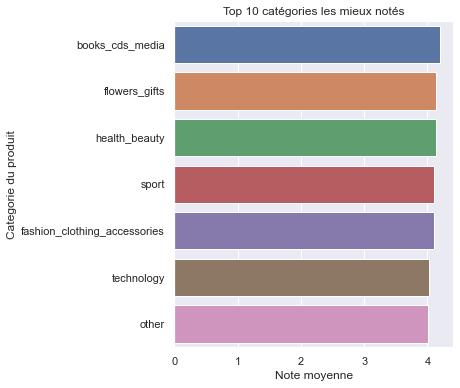

In [61]:
plt.figure(figsize=(5, 6))
sns.barplot(data=top_10_ratings, x='review_score',y='product_category')
plt.title('Top 10 catégories les mieux notés')
plt.xlabel('Note moyenne')
plt.ylabel('Categorie du produit')
plt.show()

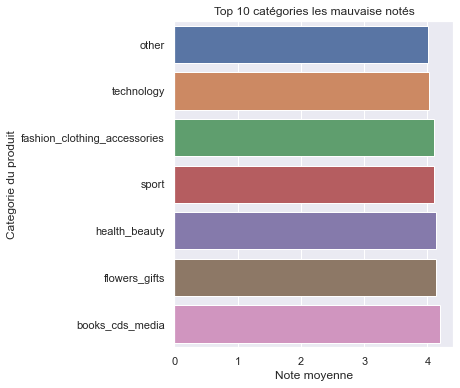

In [62]:
plt.figure(figsize=(5, 6))
sns.barplot(data=lowest_10_ratings, x='review_score',y='product_category')
plt.title('Top 10 catégories les mauvaise notés')
plt.xlabel('Note moyenne')
plt.ylabel('Categorie du produit')
plt.show()

In [63]:
top_products = data['product_category'].value_counts().reset_index().nlargest(10, 'product_category')
lowest_products = data['product_category'].value_counts().reset_index().nsmallest(10, 'product_category')

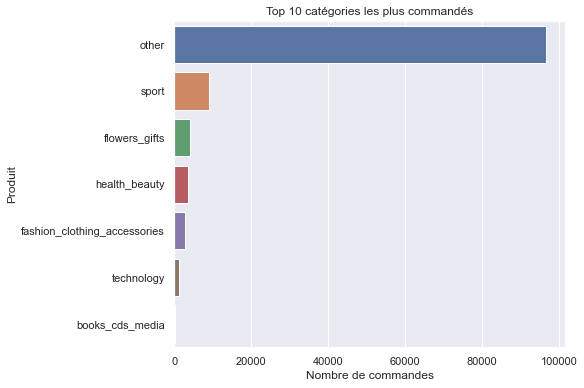

In [64]:
plt.figure(figsize=(7, 6))

sns.barplot(data=top_products, x='product_category', y='index')
plt.title('Top 10 catégories les plus commandés')
plt.xlabel('Nombre de commandes')
plt.ylabel('Produit')
plt.show()

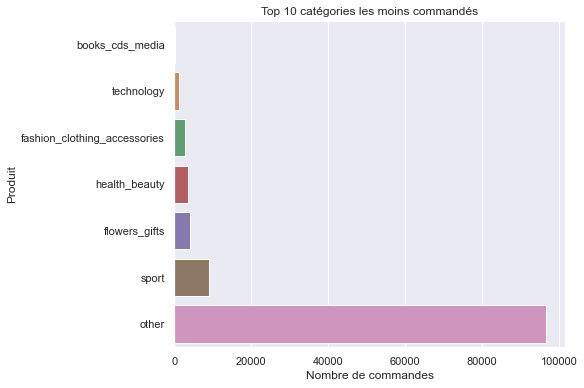

In [65]:
plt.figure(figsize=(7, 6))

sns.barplot(data=lowest_products, x='product_category', y='index')
plt.title('Top 10 catégories les moins commandés')
plt.xlabel('Nombre de commandes')
plt.ylabel('Produit')
plt.show()

In [66]:
total_category_value = pd.DataFrame(data.groupby(by=["product_category"])["payment_value"].sum().reset_index().sort_values(by=['payment_value'],ascending=False))
total_category_value.head()

product_category  payment_value
4                         other   1.701637e+07
5                         sport   1.390582e+06
2                 flowers_gifts   7.726167e+05
3                 health_beauty   5.064208e+05
1  fashion_clothing_accessories   2.902797e+05

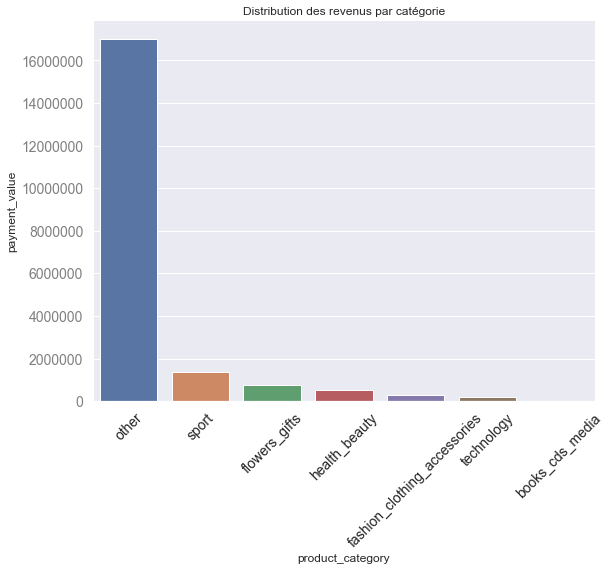

In [67]:
fig = plt.figure(figsize =([9, 7])) 
sns.set_style()
g = sns.barplot(x=total_category_value['product_category'], y=total_category_value['payment_value'])
plt.title('Distribution des revenus par catégorie')
plt.yticks(fontsize=14, color='gray');
plt.ylabel('payment_value')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('product_category')
plt.xticks(fontsize=14, rotation=45)
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
plt.show()

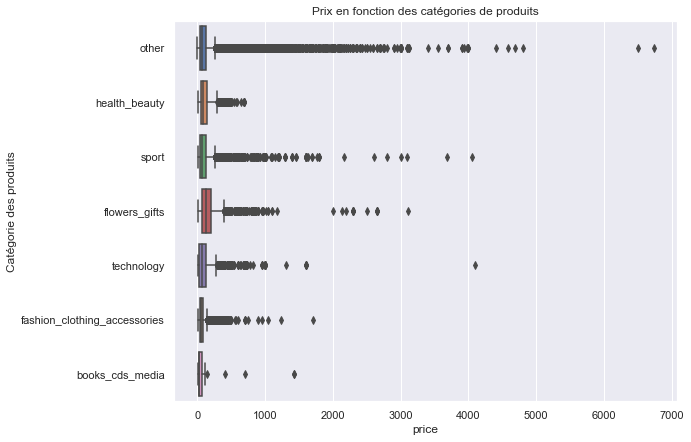

In [68]:
plt.figure(figsize=(9,7))
sns.boxplot(x="price", y="product_category", data=data)
plt.ylabel("Catégorie des produits")
plt.title("Prix en fonction des catégories de produits")
plt.show()

##### En termes de Geologication

In [69]:
customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       zip_code_prefix          customer_city customer_state  
0                14409                 franca             SP  
1                 9790  sao bernardo do campo             SP  
2                 1151              sao paulo             SP  
3                 8775        mogi das cruzes             SP  
4                13056               campinas             SP  
...                ...                    ...            ...  
99436             3937              sao paulo             SP  
99437             6764        taboao da serra             SP  
99438            60115              fortaleza             CE  
99439            92120                 canoas             RS  
99440             6703                  cotia             SP  

[99441 rows x 5 columns]

En examinant les villes où se trouvent les clients, nous voyons le plus de SP dans les données, vérifions s'ils pointent tous vers la bonne adresse.

In [70]:
data[data.customer_city.str.contains('sao b')]['customer_city'].value_counts()

sao bernardo do campo        1119
sao bento do sul               47
sao borja                      19
sao benedito                   10
sao bento do sapucai            9
sao bento                       5
sao bento do una                4
sao bernardo                    3
sao bras do suacui              2
serra de sao bento              2
sao bras                        1
sao benedito do rio preto       1
sao bento abade                 1
sao bentinho                    1
sao benedito do sul             1
sao bonifacio                   1
sao bernardino                  1
Name: customer_city, dtype: int64

On voit qu'il y a des erreurs dans les matchs ; supprimons les erreurs

In [71]:
# erreur
data[data["geolocation_state_seller"] != data["seller_state"]]

order_id  payment_sequential payment_type  \
14      2480f727e869fdeb397244a21b721b67                   1  credit_card   
52      1dcf0c8cd36ffaf57784fbdc90079310                   1  credit_card   
63      afef48d3c8a0b1b7c9b7f8f922fb5674                   1  credit_card   
237     591083bc42b589c7052118aa83118e76                   5      voucher   
239     591083bc42b589c7052118aa83118e76                   3      voucher   
241     591083bc42b589c7052118aa83118e76                   2      voucher   
243     591083bc42b589c7052118aa83118e76                   6      voucher   
245     591083bc42b589c7052118aa83118e76                   1      voucher   
247     591083bc42b589c7052118aa83118e76                   4      voucher   
574     91f377dafe157043ee827b080a27e3f5                   1  credit_card   
575     91f377dafe157043ee827b080a27e3f5                   1  credit_card   
652     6e8e751584b3e3141e3e3c39f71408c2                   1  credit_card   
653     6e8e751584b3e3141e3e3c39f71408c2                   1  credit_card   
682     21b966a378471db65c18fa4ca20d6800                   1  credit_card   
761     9e685885967d3152a558f94a355e3b6f                   1  credit_card   
1454    d3b17114bb5d12fd946e0bb2680ec2b0                   1  credit_card   
1534    9ca5909eae951dbac41c3cf4b9c0337b                   1  credit_card   
1839    13359bb817972f7492a922fa64a69cad                   1  credit_card   
1840    13359bb817972f7492a922fa64a69cad                   1  credit_card   
1841    13359bb817972f7492a922fa64a69cad                   1  credit_card   
1842    13359bb817972f7492a922fa64a69cad                   1  credit_card   
1857    cf7dd05504fa5d4ddab58fcb69bb18a6                   1  credit_card   
2553    4e16f71b2a5ddc0266f9ddfdfd0bcfba                   1       boleto   
2606    16590e9d976a66505a26c3c820d47295                   1  credit_card   
2693    6afa03fba2ab6ae8174e9c9477c85506                   1  credit_card   
2775    ea74dd3b5134d715abcf385bc904d577                   1  credit_card   
3159    a3cbfbf2c6364b1c16f1c0ce8f6fd306                   1       boleto   
3292    0d2d1445891e7aba669fa2069d695601                   1       boleto   
3374    87a99c9be1a72ccd14a90ce72e2544c3                   1  credit_card   
3406    253bf86c38be4d6ffa40eb641a356d69                   2  credit_card   
3407    253bf86c38be4d6ffa40eb641a356d69                   1  credit_card   
3549    e4b40fda48f1528f2b88921fa069b2ac                   1  credit_card   
3579    b74fdd0e8b23aa49b5d32de02043bf69                   1       boleto   
3713    06ab29b4849c4417bdac17b1e8a6e482                   1  credit_card   
3762    8092da256aefda13b330290d2ca86521                   1  credit_card   
3915    e5606996314126e707e6cdb585c4de0f                   1  credit_card   
4011    3bdb4a8f9e391c81696a80c1bf7c67ff                   1  credit_card   
4093    1ada38b97a26793e53c1205050892669                   1       boleto   
4377    8e78a66489b3861f846342d4b158c8f4                   1  credit_card   
4498    5a65cedc025f607cbdb4c5219f648ae3                   3      voucher   
4499    5a65cedc025f607cbdb4c5219f648ae3                   2      voucher   
4500    5a65cedc025f607cbdb4c5219f648ae3                   1      voucher   
4531    b5d77498cbd81c314b36f2086c5bdd2f                   1  credit_card   
4628    ba75b10a16e530cca75088408909b325                   1  credit_card   
4700    5a583547086c7958be6668ef932708cd                   1  credit_card   
4940    0470834755105bf0bb1c3062a73f1d99                   1       boleto   
4980    2bcf4e578cdef71f59c90c4c50ce5853                   1  credit_card   
4981    2bcf4e578cdef71f59c90c4c50ce5853                   1  credit_card   
4982    2bcf4e578cdef71f59c90c4c50ce5853                   1  credit_card   
5118    aca8c2b847a4cb482f374429b5210c29                   1       boleto   
5175    570daa876f56bc4b6b5e503e01318c0e                   1  credit_card   
5520    528b9cd42ab9f06d9cbf

In [72]:
geolocation[(geolocation["geolocation_state"] == "SC") & (geolocation["geolocation_city"] == "itajai")]

zip_code_prefix  geolocation_lat  geolocation_lng geolocation_city  \
909293            88310       -26.891052       -48.701608           itajai   
909296            88309       -26.895500       -48.687952           itajai   
909297            88306       -26.935823       -48.627747           itajai   
909300            88311       -26.877642       -48.705441           itajai   
909307            88302       -26.920172       -48.657852           itajai   
909318            88317       -26.876740       -48.750403           itajai   
909319            88308       -26.928509       -48.700390           itajai   
909322            88303       -26.912429       -48.677381           itajai   
909332            88304       -26.899380       -48.679729           itajai   
909374            88312       -26.908691       -48.703615           itajai   
909405            88316       -26.945308       -48.718467           itajai   
910010            88318       -27.037284       -48.861505           itajai   
912083            88313       -26.971308       -48.683232           itajai   

       geolocation_state  
909293                SC  
909296                SC  
909297                SC  
909300                SC  
909307                SC  
909318                SC  
909319                SC  
909322                SC  
909332                SC  
909374                SC  
909405                SC  
910010                SC  
912083                SC

In [73]:
geolocation[(geolocation["geolocation_state"] == "SP") & (geolocation["geolocation_city"] == "itajai")]

Empty DataFrame
Columns: [zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state]
Index: []

In [74]:
sellers[(sellers["seller_state"] == "SP") & (sellers["seller_city"] == "itajai")]

seller_id  zip_code_prefix seller_city  \
1303  0bae85eb84b9fb3bd773911e89288d54            88301      itajai   
1449  52b53f7061969fe471d119b6195da864            88301      itajai   

     seller_state  
1303           SP  
1449           SP

On voit qu'il y a des fausses notifications dans les villes des vendeurs, il est plus logique d'utiliser le jeu de données de géolocalisation ;
c'est-à-dire 'geolocation_state_seller, geo_location_city_seller.' nous utiliserons des variables ;

In [75]:
print(data.shape[1])
data.drop(["seller_state", "seller_city", "customer_city","customer_state"], axis=1, inplace=True)

52


In [76]:
print(data.shape[1])
data.rename(columns={"geolocation_state_seller": "seller_state", 
                     "geolocation_city_seller": "seller_city",
                     "geolocation_lng_seller": "lng_seller", 
                     "geolocation_lat_seller": "lat_seller",
                     "geolocation_lng_customer": "lng_customer", 
                     "geolocation_lat_customer": "lat_customer",
                     "geolocation_city_customer": "customer_city", 
                     "geolocation_state_customer": "customer_state"}, inplace=True)

48


## Villes avec la plus grande génération de revenus

In [77]:
top_orders_value_cities = data.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_orders_value_cities["% of Total Payments"] = (top_orders_value_cities["payment_value"] / top_orders_value_cities["payment_value"].sum()) * 100
top_orders_value_cities["Cum % of Total Payments"] = top_orders_value_cities["% of Total Payments"].cumsum()

Text(0.5, 1.0, 'TOP 10 des villes par génération de revenus')

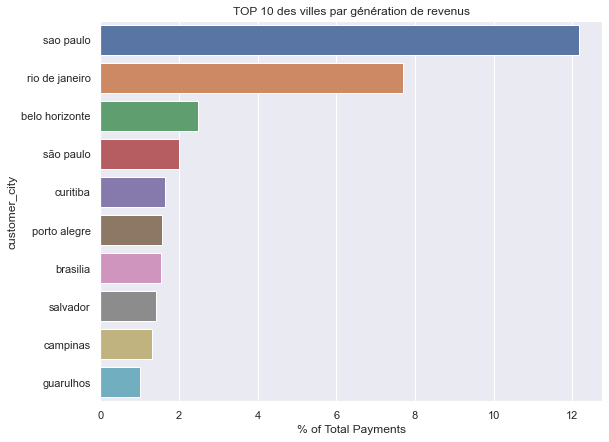

In [78]:
fig=plt.figure(figsize=(9,7))
ax = sns.barplot(x="% of Total Payments", y="customer_city", data=top_orders_value_cities[:10])
ax.set_title("TOP 10 des villes par génération de revenus")

## Top 20 des villes les plus populaires Shopping

Text(0, 0.5, 'City')

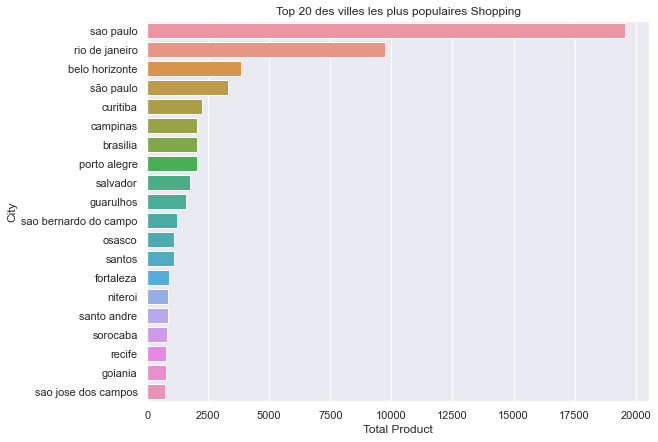

In [79]:
top_20_city_shopping = data['order_item_id'].groupby(data['customer_city']).sum().sort_values(ascending=False)[:20]
fig=plt.figure(figsize=(9,7))
sns.barplot(y=top_20_city_shopping.index,x=top_20_city_shopping.values)
plt.title('Top 20 des villes les plus populaires Shopping')
plt.xlabel('Total Product')
plt.ylabel('City')

In [80]:
data['order_purchase_dayofweek']= orders['order_purchase_dayofweek'] 
data['order_purchase_year']=orders['order_purchase_year'] 
data['order_purchase_month']=orders['order_purchase_month'] 
data['order_purchase_day']=orders['order_purchase_day'] 
data['order_purchase_hour']=orders['order_purchase_hour'] 

In [81]:
data[['order_id', 'payment_value', 'price', 'freight_value']].sort_values('order_id').groupby(
    'order_id').agg({'payment_value': 'max', 'price': 'sum', 'freight_value': 'max'})

payment_value   price  freight_value
order_id                                                              
00010242fe8c5a6d1ba2dd792cb16214          72.19   58.90          13.29
00018f77f2f0320c557190d7a144bdd3         259.83  239.90          19.93
000229ec398224ef6ca0657da4fc703e         216.87  199.00          17.87
00024acbcdf0a6daa1e931b038114c75          25.78   12.99          12.79
00042b26cf59d7ce69dfabb4e55b4fd9         218.04  199.90          18.14
...                                         ...     ...            ...
fffc94f6ce00a00581880bf54a75a037         343.40  299.99          43.41
fffcd46ef2263f404302a634eb57f7eb         386.53  350.00          36.53
fffce4705a9662cd70adb13d4a31832d         116.85   99.90          16.95
fffe18544ffabc95dfada21779c9644f          64.71   55.99           8.72
fffe41c64501cc87c801fd61db3f6244          55.79   43.00          12.79

[97916 rows x 3 columns]

In [82]:
data.loc[:, 'pourcentage_valeur_produit_sur_prix_total'] = (data.price/data.payment_value)*100
data.loc[:, 'pourcentage_valeur_port_sur_prix_total'] = (data.freight_value/data.payment_value)*100

verif = data[['order_id', 'payment_value', 'price', 'freight_value',
              'pourcentage_valeur_produit_sur_prix_total', 'pourcentage_valeur_port_sur_prix_total']].sort_values('order_id').groupby('order_id').agg({'payment_value': 'max', 'price': 'sum', 'freight_value': 'max', 'pourcentage_valeur_produit_sur_prix_total': 'sum', 'pourcentage_valeur_port_sur_prix_total': 'max'})
verif

payment_value   price  freight_value  \
order_id                                                                 
00010242fe8c5a6d1ba2dd792cb16214          72.19   58.90          13.29   
00018f77f2f0320c557190d7a144bdd3         259.83  239.90          19.93   
000229ec398224ef6ca0657da4fc703e         216.87  199.00          17.87   
00024acbcdf0a6daa1e931b038114c75          25.78   12.99          12.79   
00042b26cf59d7ce69dfabb4e55b4fd9         218.04  199.90          18.14   
...                                         ...     ...            ...   
fffc94f6ce00a00581880bf54a75a037         343.40  299.99          43.41   
fffcd46ef2263f404302a634eb57f7eb         386.53  350.00          36.53   
fffce4705a9662cd70adb13d4a31832d         116.85   99.90          16.95   
fffe18544ffabc95dfada21779c9644f          64.71   55.99           8.72   
fffe41c64501cc87c801fd61db3f6244          55.79   43.00          12.79   

                                  pourcentage_valeur_produit_sur_prix_total  \
order_id                                                                      
00010242fe8c5a6d1ba2dd792cb16214                                  81.590248   
00018f77f2f0320c557190d7a144bdd3                                  92.329600   
000229ec398224ef6ca0657da4fc703e                                  91.760041   
00024acbcdf0a6daa1e931b038114c75                                  50.387898   
00042b26cf59d7ce69dfabb4e55b4fd9                                  91.680426   
...                                                                     ...   
fffc94f6ce00a00581880bf54a75a037                                  87.358765   
fffcd46ef2263f404302a634eb57f7eb                                  90.549246   
fffce4705a9662cd70adb13d4a31832d                                  85.494223   
fffe18544ffabc95dfada21779c9644f                                  86.524494   
fffe41c64501cc87c801fd61db3f6244                                  77.074745   

                                  pourcentage_valeur_port_sur_prix_total  
order_id                                                                  
00010242fe8c5a6d1ba2dd792cb16214                               18.409752  
00018f77f2f0320c557190d7a144bdd3                                7.670400  
000229ec398224ef6ca0657da4fc703e                                8.239959  
00024acbcdf0a6daa1e931b038114c75                               49.612102  
00042b26cf59d7ce69dfabb4e55b4fd9                                8.319574  
...                                                                  ...  
fffc94f6ce00a00581880bf54a75a037                               12.641235  
fffcd46ef2263f404302a634eb57f7eb                                9.450754  
fffce4705a9662cd70adb13d4a31832d                               14.505777  
fffe18544ffabc95dfada21779c9644f                               13.475506  
fffe41c64501cc87c801fd61db3f6244                               22.925255  

[97916 rows x 5 columns]

In [83]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956  

    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])

    # Formule Haversine
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))

    return d


data.loc[:, 'distance_seller_customer'] = [haversine_distance(x1, y1, x2, y2) for x1, y1, x2, y2 in zip(
    data.lat_seller, data.lng_seller, data.lat_customer, data.lng_customer)]

In [84]:
def freq(l):
    if len(l) == 1:
        return 0
    else:
        n = len(l)
        l.sort(reverse=True)
        l = [l[i]-l[i+1] for i in range(len(l)-1)]
        l = [abs(i.days) for i in l]
        return (sum(l)/n)

In [85]:
date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

for i in date_cols:
 
  data[i] = pd.to_datetime(data[i])
  

### Création du dataset clients

In [86]:
grouped = data.groupby(['customer_unique_id'])
nb_achat = grouped['order_id'].agg(
    ['count']).rename(columns={'count': 'nb_achat'})
moyenne_montant_achat = grouped['payment_value'].agg(
    ['mean']).rename(columns={'mean': 'moyenne_montant_achat'})
frais_de_port = grouped['pourcentage_valeur_port_sur_prix_total'].agg(
    ['mean']).rename(columns={'mean': '%_frais_de_livraison'})
nb_categories = grouped['product_category'].apply(
    set).apply(len).rename("nb_categorie")
payment_type = grouped['payment_type'].apply(list).apply(
    lambda l: mode(l)).rename('moyen_de_paiement')

categorie = grouped['product_category'].apply(list).apply(
    lambda l: mode(l)).rename('categorie_la_plus_presente')


distance_seller_customer = grouped['distance_seller_customer'].agg(
    ['mean']).rename(columns={'mean': 'distance_seller_customer'})

volume_moyen_produit = grouped['product_volume_cm3'].agg(
    ['mean']).rename(columns={'mean': 'volume_moyen_produit'})
poids_moyen_produit = grouped['product_weight_g'].agg(
    ['mean']).rename(columns={'mean': 'poids_moyen_produit'})
nb_photos_moyen_produit = grouped['product_photos_qty'].agg(
    ['mean']).rename(columns={'mean': 'nb_photos_moyen_produit'})

temps_commande_livraison_effective = grouped['temps_commande_livraison'].agg(
    ['mean']).rename(columns={'mean': 'temps_commande_livraison'})
retard = grouped['livraison_en_retard'].apply(
    sum).rename('nb_commande_en_retard')
frequence = grouped['order_purchase_timestamp'].apply(
    list).apply(lambda l: freq(l)).rename('frequence')

date_coupe = max(data['order_purchase_timestamp'])
recence = grouped['order_purchase_timestamp'].apply(
    lambda x: (date_coupe - x.max()).days).rename('recence')
client_depuis = grouped['order_purchase_timestamp'].apply(
    lambda x: (date_coupe - x.min()).days).rename('client_depuis')



In [101]:
data_filter = pd.concat([nb_achat, moyenne_montant_achat, frais_de_port, nb_categories,
                    payment_type,  categorie, distance_seller_customer,
                    volume_moyen_produit, poids_moyen_produit, temps_commande_livraison_effective,
                    retard, frequence, recence, client_depuis], axis=1)
data_filter.head()

nb_achat  moyenne_montant_achat  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2         1                 141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f         1                  27.19   
0000f46a3911fa3c0805444483337064         1                  86.22   
0000f6ccb0745a6a4b88665a16c9f078         1                  43.62   
0004aac84e0df4da2b147fca70cf8255         1                 196.89   

                                  %_frais_de_livraison  nb_categorie  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2              8.456660             1   
0000b849f77a49e4a4ce2b2a4ca5be3f             30.489150             1   
0000f46a3911fa3c0805444483337064             19.972164             1   
0000f6ccb0745a6a4b88665a16c9f078             40.417240             1   
0004aac84e0df4da2b147fca70cf8255              8.578394             1   

                                 moyen_de_paiement categorie_la_plus_presente  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2       credit_card                      other   
0000b849f77a49e4a4ce2b2a4ca5be3f       credit_card                      other   
0000f46a3911fa3c0805444483337064       credit_card                      other   
0000f6ccb0745a6a4b88665a16c9f078       credit_card                      other   
0004aac84e0df4da2b147fca70cf8255       credit_card                      other   

                                  distance_seller_customer  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                 67.798807   
0000b849f77a49e4a4ce2b2a4ca5be3f                 14.174956   
0000f46a3911fa3c0805444483337064                321.220714   
0000f6ccb0745a6a4b88665a16c9f078               1540.720169   
0004aac84e0df4da2b147fca70cf8255                 95.565228   

                                  volume_moyen_produit  poids_moyen_produit  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                7616.0               1500.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                5148.0                375.0   
0000f46a3911fa3c0805444483337064               43750.0               1500.0   
0000f6ccb0745a6a4b88665a16c9f078                1045.0                150.0   
0004aac84e0df4da2b147fca70cf8255                 528.0               6050.0   

                                  temps_commande_livraison  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                      12.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                       5.0   
0000f46a3911fa3c0805444483337064                       5.0   
0000f6ccb0745a6a4b88665a16c9f078                      19.0   
0004aac84e0df4da2b147fca70cf8255                       8.0   

                                  nb_commande_en_retard  frequence  recence  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                      0        0.0      115   
0000b849f77a49e4a4ce2b2a4ca5be3f                      0        0.0      118   
0000f46a3911fa3c0805444483337064                      0        0.0      541   
0000f6ccb0745a6a4b88665a16c9f078                      0        0.0      325   
0004aac84e0df4da2b147fca70cf8255                      0        0.0      292   

                                  client_depuis  
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2            115  
0000b849f77a49e4a4ce2b2a4ca5be3f            118  
0000f46a3911fa3c0805444483337064            541  
0000f6ccb0745a6a4b88665a16c9f078            325  
0004aac84e0df4da2b147fca70cf8255            292

In [102]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nb_achat                    94720 non-null  int64  
 1   moyenne_montant_achat       94720 non-null  float64
 2   %_frais_de_livraison        94720 non-null  float64
 3   nb_categorie                94720 non-null  int64  
 4   moyen_de_paiement           94720 non-null  object 
 5   categorie_la_plus_presente  94720 non-null  object 
 6   distance_seller_customer    94256 non-null  float64
 7   volume_moyen_produit        94707 non-null  float64
 8   poids_moyen_produit         94707 non-null  float64
 9   temps_commande_livraison    78094 non-null  float64
 10  nb_commande_en_retard       94720 non-null  int64  
 11  frequence                   94720 non-null  float64
 12  recence                     94720 n

In [103]:
import datetime as dt
from datetime import date
from datetime import datetime
my_date = date(2018,9,3)
my_datetime = datetime(my_date.year, my_date.month, my_date.day)
print(my_datetime)

2018-09-03 00:00:00


### Création d'un dataframe pour l'analyse rfm 

In [104]:
Rfm= data.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda date: (my_datetime - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'payment_value': lambda price: price.sum()})

Rfm.columns=['recency','frequency','monetary']
Rfm['recency'] = Rfm['recency'].astype(int)
Rfm['frequency'] = Rfm['frequency'].astype(int)
Rfm['monetary'] = Rfm['monetary'].astype(float)



In [105]:
Rfm.head()

recency  frequency  monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      115          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     27.19
0000f46a3911fa3c0805444483337064      541          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      325          1     43.62
0004aac84e0df4da2b147fca70cf8255      292          1    196.89

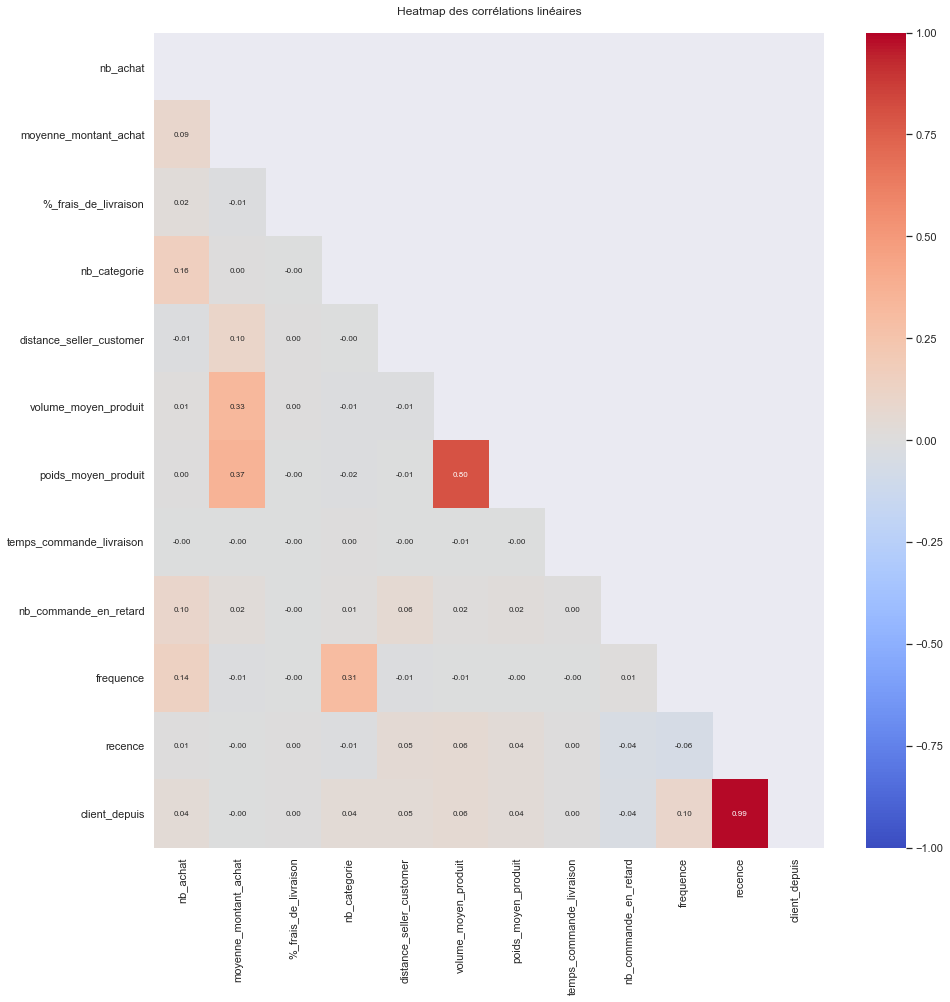

In [106]:
corr = data_filter.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True,
                 vmin=-1, vmax=1,
                fmt=".2f", annot_kws={'size': 8},
                mask=mask,
                center=0,
                cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [107]:
data_filter.drop(["poids_moyen_produit"], axis=1, inplace=True)

In [108]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nb_achat                    94720 non-null  int64  
 1   moyenne_montant_achat       94720 non-null  float64
 2   %_frais_de_livraison        94720 non-null  float64
 3   nb_categorie                94720 non-null  int64  
 4   moyen_de_paiement           94720 non-null  object 
 5   categorie_la_plus_presente  94720 non-null  object 
 6   distance_seller_customer    94256 non-null  float64
 7   volume_moyen_produit        94707 non-null  float64
 8   temps_commande_livraison    78094 non-null  float64
 9   nb_commande_en_retard       94720 non-null  int64  
 10  frequence                   94720 non-null  float64
 11  recence                     94720 non-null  int64  
 12  client_depuis               94720 n

In [109]:
Rfm.to_csv("RFM_olist-customers-segmentation.csv")

In [110]:
data_filter.to_csv("olist-customers-segmentation.csv")